# Un esercizio di confronto di performance



IPython e la sua interfaccia web Jupyter sono ambienti ideali per sperimentare interattivamente con del codice, analizzare dati, fare dei prototipi per dei programmi, e documentare idee. Vediamo un esempio: mostreremo la differenza di prestazioni tra un codice iterativo e uno ricorsivo per il calcolo della funzione di Fibonacci.

In Jupyter possiamo mettere all'inizio di una cella la stringa `%%file <nomefile>` ed il contenuto di questa cella non verrà eseguito, bensì salvato sul file corrispondente. Normalmente non è il caso di scrivere programmi lunghi o moduli python all'interno di una cella di un notebook Jupyter, tuttavia per questo esempio volevo che vedeste il codice per intero. Segue l'implementazione delle due versioni di Fibonacci.



In [1]:
%%file fib.py

def ifib(n):
    if n<=0:
        return 0
    elif n==1:
        return 1
    
    old, cur = 0,1
    for i in range(2,n+1):
        old , cur = cur, cur+old
    return cur


def rfib(n):
    if n<=0:
        return 0
    elif n==1:
        return 1
    
    return rfib(n-1)+rfib(n-2)



if __name__ == '__main__':
    print("Eseguito direttamente nel sorgente fib.py")
    print("Eseguo fib iterativo per n=100: ", end='')
    print(ifib(100))
    print("Eseguo fib ricorsivo per n=20: ", end='')
    print(rfib(20))
    

Overwriting fib.py


In [4]:
!ls *.py

fib.py


## Eseguire un programma contenuto in un file esterno

Il comando *magico* `%run <nomefile>` permette di eseguire un programma python contenuto in un file esterno. Essenzialmente è come se il programma venisse eseguito con il comando 
```
$ python <nomefile>
```

con la differenza che tutte le funzioni, le variabili globali, e gli oggetti definiti dal programma restano a disposizione della sessione IPython.

In [5]:
%run fib.py

Eseguito direttamente nel sorgente fib.py
Eseguo fib iterativo per n=100: 354224848179261915075
Eseguo fib ricorsivo per n=20: 6765


In [6]:
ifib(10)

55

In [7]:
rfib(10)

55

Le funzioni `ifib` e `rfib` non erano presenti nella sessione IPython, e adesso sono presenti perché sono state create durante l'esecuzione di `fib.py`.

## Valutare il tempo di esecuzione di una funzione

È possibile usare il comando magico `%timeit` per stimare il tempo di esecuzione di una espressione python. L'espressione viene eseguita numerose volte, in modo che la stima sia accurata.

In [8]:
%timeit ifib(100)

4.55 µs ± 281 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [9]:
%timeit rfib(20)

2.14 ms ± 141 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Stima del tempo di esecuzione in python

Adesso facciamo la stessa cosa usando una funzione python. La funzione eseguirà il programma 10 volte e restituirà il tempo medio di esecuzione. 

In [10]:
import time

def tempodiesecuzione(funzione,parametro,ripetizioni=10):

    start_time = time.time()
    
    for i in range(ripetizioni):
        funzione(parametro)
    
    end_time = time.time()
    return (end_time - start_time) / ripetizioni


## Eseguiamo i calcoli per n da 1 a 40

Stimiamo, per *n* da 1 a 40, i tempi di esecuzione di entrambe le espressioni `ifib(n)` e `rfib(n)`.

In [12]:
X = range(1,41)  # numeri da 1 a 40

# Fibonacci iterativo
I = []
for n in X:
    t = tempodiesecuzione(ifib,n)
    I.append(t)
    
# Fibonacci ricorsivo
R = []
for n in X:
    if n>34:
        t = tempodiesecuzione(rfib,n,ripetizioni=1)
    else:
        t = tempodiesecuzione(rfib,n)
    R.append(t)

## Plot dei dati appena ottenuti

I dati ottenuti possiamo visualizzarli utilizzando diverse tecniche. Qui vediamo il classico grafico dove la dimensione dell'input è sull'asse $x$ e i tempi di esecuzione dei due programmi sono sull'asse $y$.

Per fare questo plot utiliziamo la libreria `matplotlib`

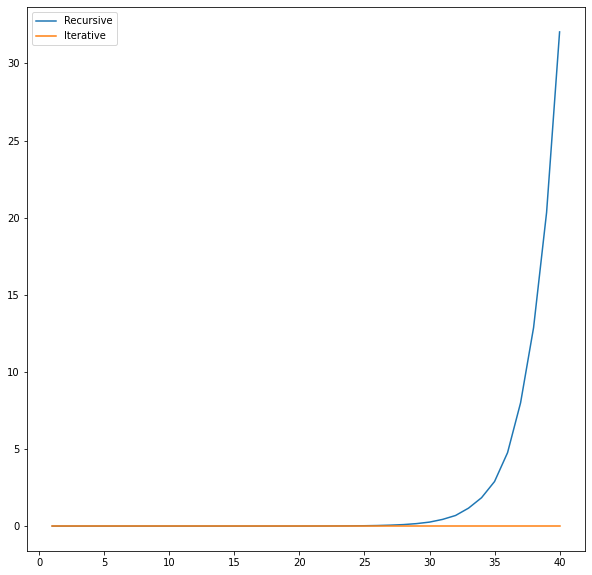

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(X,R,label='Recursive')
plt.plot(X,I,label='Iterative')
plt.legend()


La versione ricorsiva ha un tempo di esecuzione che cresce molto più velocemente della versione iterativa.
Possiamo scalare l'asse delle y in modo logaritmico, così da osservare meglio l'andamento.

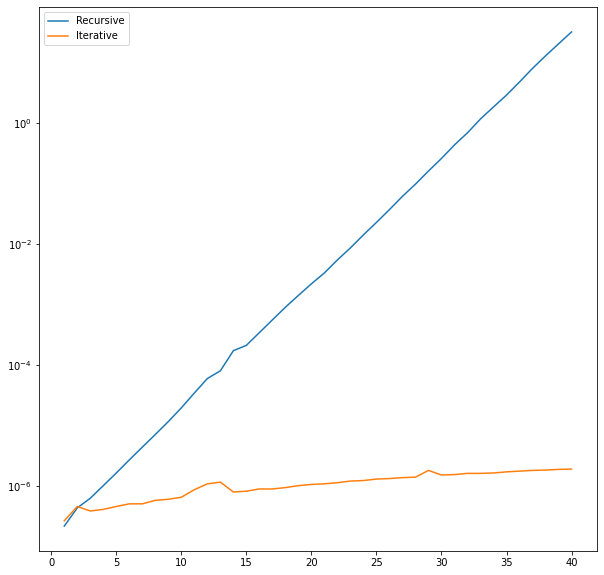

In [14]:
plt.figure(figsize=(10,10))
plt.plot(X,R,label='Recursive')
plt.plot(X,I,label='Iterative')
plt.yscale('log')
plt.legend()


## Jupyter vs IPython

Abbiamo lavorato sia in IPython che in Jupyter, e abbiamo visto che le operazioni possibili nei due ambienti sono molto simili. Questo non è sorprendente perché Jupyter nasce come interfaccia web per IPython. Vediamo le principali differenze tra i due ambienti:


| |  IPython | Jupyter |
--- | --- | --- 
sessione | singola | celle multiple
plot | salvati su file | mostrati "in linea" 
salvataggio | nessuno | file notebook
testo aggiuntivo| no|celle markdown
esecuzione | singolo programma | servizio web